# Advanced Insights & Deep Dive Analysis

## 🎯 Advanced Data Science Objectives

This notebook goes beyond basic business intelligence to provide sophisticated data science insights:

### **Advanced Analytics Areas**:
1. **Time Series Analysis**: Trending patterns over time, seasonality, and forecasting
2. **Content Analysis**: NLP on titles, tags, and descriptions for content intelligence
3. **Network Analysis**: Channel relationships and collaboration patterns
4. **Anomaly Detection**: Viral content identification and outlier analysis
5. **Cohort Analysis**: User behavior patterns and retention analysis
6. **Statistical Modeling**: Advanced statistical tests and hypothesis validation
7. **Feature Engineering**: Advanced feature creation using domain knowledge
8. **Segmentation**: Advanced clustering and market segmentation

### **Data Science Techniques**:
- **Statistical Analysis**: Hypothesis testing, A/B testing frameworks
- **Time Series**: ARIMA, Prophet, seasonal decomposition
- **NLP**: TF-IDF, word embeddings, sentiment analysis
- **Clustering**: K-means, DBSCAN, hierarchical clustering
- **Dimensionality Reduction**: PCA, t-SNE, UMAP
- **Anomaly Detection**: Isolation Forest, Local Outlier Factor
- **Network Analysis**: Graph theory, centrality measures

In [14]:
# Advanced Data Science Setup
from notebook_setup import setup_notebook_environment, test_imports

# Setup paths and test imports
project_root = setup_notebook_environment()
test_imports()

✅ Project root: e:\Study Space\Analytics Enginerring\Data Engineering\Azure Databricks\ADB_Practice\YouTube Analytics
✅ Added to Python path:
   - e:\Study Space\Analytics Enginerring\Data Engineering\Azure Databricks\ADB_Practice\YouTube Analytics
   - e:\Study Space\Analytics Enginerring\Data Engineering\Azure Databricks\ADB_Practice\YouTube Analytics\src
✅ Config import successful
✅ SparkUtils import successful
✅ YouTubeDataReader import successful
✅ All imports working correctly!


True

In [15]:
# Import comprehensive data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Advanced Analytics Libraries
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.feature_extraction.text import TfidfVectorizer

# Time Series Analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# NLP Libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

# Network Analysis
import networkx as nx

# Statistical Testing
from scipy.stats import chi2_contingency, mannwhitneyu, kruskal

import warnings
warnings.filterwarnings('ignore')

# Configuration
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (15, 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Advanced Data Science Environment Setup Complete!")
print(f"Libraries loaded: pandas, numpy, sklearn, statsmodels, nltk, networkx, plotly")

Advanced Data Science Environment Setup Complete!
Libraries loaded: pandas, numpy, sklearn, statsmodels, nltk, networkx, plotly


## 📊 Data Loading & Advanced Feature Engineering

In [16]:
# Load the engineered dataset
from config.settings import Config
config = Config()

# Load both processed and feature-engineered data
features_path = config.OUTPUT_DATA_PATH / "youtube_trending_videos_with_features.parquet"
df = pd.read_parquet(features_path)

print(f"Dataset loaded: {df.shape[0]:,} rows, {df.shape[1]} columns")
print(f"Date range: {df['trending_date'].min()} to {df['trending_date'].max()}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

# Display comprehensive dataset info
print("\nDataset Overview:")
print(df.info())

print("\nSample Data:")
display(df.head())

Dataset loaded: 40,899 rows, 24 columns
Date range: 17.01.12 to 18.31.05
Memory usage: 121.6 MB

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40899 entries, 0 to 40898
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40899 non-null  object        
 1   trending_date           40899 non-null  object        
 2   title                   40899 non-null  object        
 3   channel_title           40899 non-null  object        
 4   category_id             40899 non-null  object        
 5   publish_time            40899 non-null  object        
 6   tags                    40899 non-null  object        
 7   views                   40899 non-null  int64         
 8   likes                   40899 non-null  int64         
 9   dislikes                40899 non-null  int64         
 10  comment_count           40899 non-null  int64      

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name,publish_time_parsed,engagement_score,trending_date_parsed,publish_date_parsed,days_to_trend,trending_rank
0,aLSG3178eD4,17.01.12,Tell Hollywood to stand with immigrants,Define American,29,2017-11-28T13:00:35.000Z,"DACA,black panther",1873,0,0,0,https://i.ytimg.com/vi/aLSG3178eD4/default.jpg,True,True,False,"Undocumented in Hollywood? Yes, and we are #He...",US,Nonprofits & Activism,2017-11-28 13:00:35,0.000000,2017-12-01,2017-11-28,3,1
1,YL9sNrOlK-I,17.03.12,2 wingsuit flyers BASE jump into a plane in mi...,Red Bull,17,2017-11-28T16:00:03.000Z,"red bull,redbull,action sports,extreme sports,...",3027415,31069,614,2060,https://i.ytimg.com/vi/YL9sNrOlK-I/default.jpg,False,False,False,French wingsuit flyers recently completed an u...,US,Sports,2017-11-28 16:00:03,0.005376,2017-12-03,2017-11-28,5,1
2,Em9EI37Yy9g,17.03.12,Redskins vs. Cowboys | NFL Week 13 Game Highli...,NFL,17,2017-12-01T04:54:15.000Z,"NFL,Football,offense,defense,afc,nfc,American ...",1128180,9876,621,2856,https://i.ytimg.com/vi/Em9EI37Yy9g/default.jpg,False,False,False,The Washington Redskins take on the Dallas Cow...,US,Sports,2017-12-01 04:54:15,0.005247,2017-12-03,2017-12-01,2,2
3,0nybdPCuvRI,17.03.12,LeBron James ejected for first time in career ...,ESPN,17,2017-11-29T02:16:58.000Z,"lebron,james,ejected,first,time,career,lebron ...",634970,3042,257,1218,https://i.ytimg.com/vi/0nybdPCuvRI/default.jpg,False,False,False,LeBron James is tossed from the game after arg...,US,Sports,2017-11-29 02:16:58,0.003052,2017-12-03,2017-11-29,4,3
4,VhexfxLPgTE,17.03.12,See you in Russia!,FIFATV,17,2017-11-30T07:30:00.000Z,"FIFA,official,Football,Soccer,Futbol,Futebol,F...",254082,6870,72,1425,https://i.ytimg.com/vi/VhexfxLPgTE/default.jpg,False,False,False,"Ahead of Friday’s Final Draw, 32 key players r...",US,Sports,2017-11-30 07:30:00,0.015258,2017-12-03,2017-11-30,3,4


## 🔍 Advanced Feature Engineering

Creating sophisticated features for deeper analysis

In [17]:
# Advanced Feature Engineering
def create_advanced_features(df):
    """Create advanced features for deeper analysis"""
    df_advanced = df.copy()
    
    # 1. Temporal Features
    df_advanced['publish_date'] = pd.to_datetime(df_advanced['publish_time']).dt.date
    df_advanced['trending_date_parsed'] = pd.to_datetime(df_advanced['trending_date'], format='%y.%d.%m')
    df_advanced['publish_hour'] = pd.to_datetime(df_advanced['publish_time']).dt.hour
    df_advanced['publish_day_of_week'] = pd.to_datetime(df_advanced['publish_time']).dt.dayofweek
    df_advanced['publish_month'] = pd.to_datetime(df_advanced['publish_time']).dt.month
    df_advanced['publish_year'] = pd.to_datetime(df_advanced['publish_time']).dt.year
    
    # 2. Content Features
    df_advanced['title_length'] = df_advanced['title'].str.len()
    df_advanced['title_word_count'] = df_advanced['title'].str.split().str.len()
    df_advanced['title_caps_ratio'] = df_advanced['title'].str.count(r'[A-Z]') / df_advanced['title_length']
    df_advanced['title_exclamation_count'] = df_advanced['title'].str.count('!')
    df_advanced['title_question_count'] = df_advanced['title'].str.count('\?')
    
    # 3. Engagement Ratios
    df_advanced['like_dislike_ratio'] = df_advanced['likes'] / (df_advanced['dislikes'] + 1)
    df_advanced['comment_view_ratio'] = df_advanced['comment_count'] / df_advanced['views']
    df_advanced['like_view_ratio'] = df_advanced['likes'] / df_advanced['views']
    df_advanced['dislike_view_ratio'] = df_advanced['dislikes'] / df_advanced['views']
    
    # 4. Performance Categories
    df_advanced['view_category'] = pd.cut(df_advanced['views'], 
                                         bins=[0, 100000, 1000000, 10000000, float('inf')],
                                         labels=['Low', 'Medium', 'High', 'Viral'])
    
    df_advanced['engagement_category'] = pd.cut(df_advanced['engagement_score'],
                                               bins=[0, 0.01, 0.02, 0.05, float('inf')],
                                               labels=['Low', 'Medium', 'High', 'Exceptional'])
    
    # 5. Trending Velocity Categories
    df_advanced['trending_speed_category'] = pd.cut(df_advanced['days_to_trend'],
                                                   bins=[-1, 0, 1, 7, 30, float('inf')],
                                                   labels=['Same_Day', 'Next_Day', 'Week', 'Month', 'Long_Term'])
    
    # 6. Channel Performance Metrics
    channel_stats = df_advanced.groupby('channel_title').agg({
        'views': ['count', 'mean', 'std'],
        'engagement_score': 'mean',
        'days_to_trend': 'mean'
    }).round(4)
    
    channel_stats.columns = ['channel_video_count', 'channel_avg_views', 'channel_views_std', 
                             'channel_avg_engagement', 'channel_avg_days_to_trend']
    
    df_advanced = df_advanced.merge(channel_stats, left_on='channel_title', right_index=True, how='left')
    
    # 7. Category Performance Metrics
    category_stats = df_advanced.groupby('category_name').agg({
        'views': 'mean',
        'engagement_score': 'mean',
        'days_to_trend': 'mean'
    }).round(4)
    
    category_stats.columns = ['category_avg_views', 'category_avg_engagement', 'category_avg_days_to_trend']
    df_advanced = df_advanced.merge(category_stats, left_on='category_name', right_index=True, how='left')
    
    return df_advanced

# Create advanced features
df_advanced = create_advanced_features(df)

print(f"Advanced features created. New shape: {df_advanced.shape}")
print(f"New features added: {df_advanced.shape[1] - df.shape[1]}")

# Display new features
new_features = [col for col in df_advanced.columns if col not in df.columns]
print(f"\nNew Features Created: {new_features}")

Advanced features created. New shape: (40899, 49)
New features added: 25

New Features Created: ['publish_date', 'publish_hour', 'publish_day_of_week', 'publish_month', 'publish_year', 'title_length', 'title_word_count', 'title_caps_ratio', 'title_exclamation_count', 'title_question_count', 'like_dislike_ratio', 'comment_view_ratio', 'like_view_ratio', 'dislike_view_ratio', 'view_category', 'engagement_category', 'trending_speed_category', 'channel_video_count', 'channel_avg_views', 'channel_views_std', 'channel_avg_engagement', 'channel_avg_days_to_trend', 'category_avg_views', 'category_avg_engagement', 'category_avg_days_to_trend']


## 📈 Time Series Analysis

Advanced temporal pattern analysis and forecasting

Time Series Analysis Complete
Daily trends shape: (205, 3)
Date range: 2017-11-14 00:00:00 to 2018-06-14 00:00:00


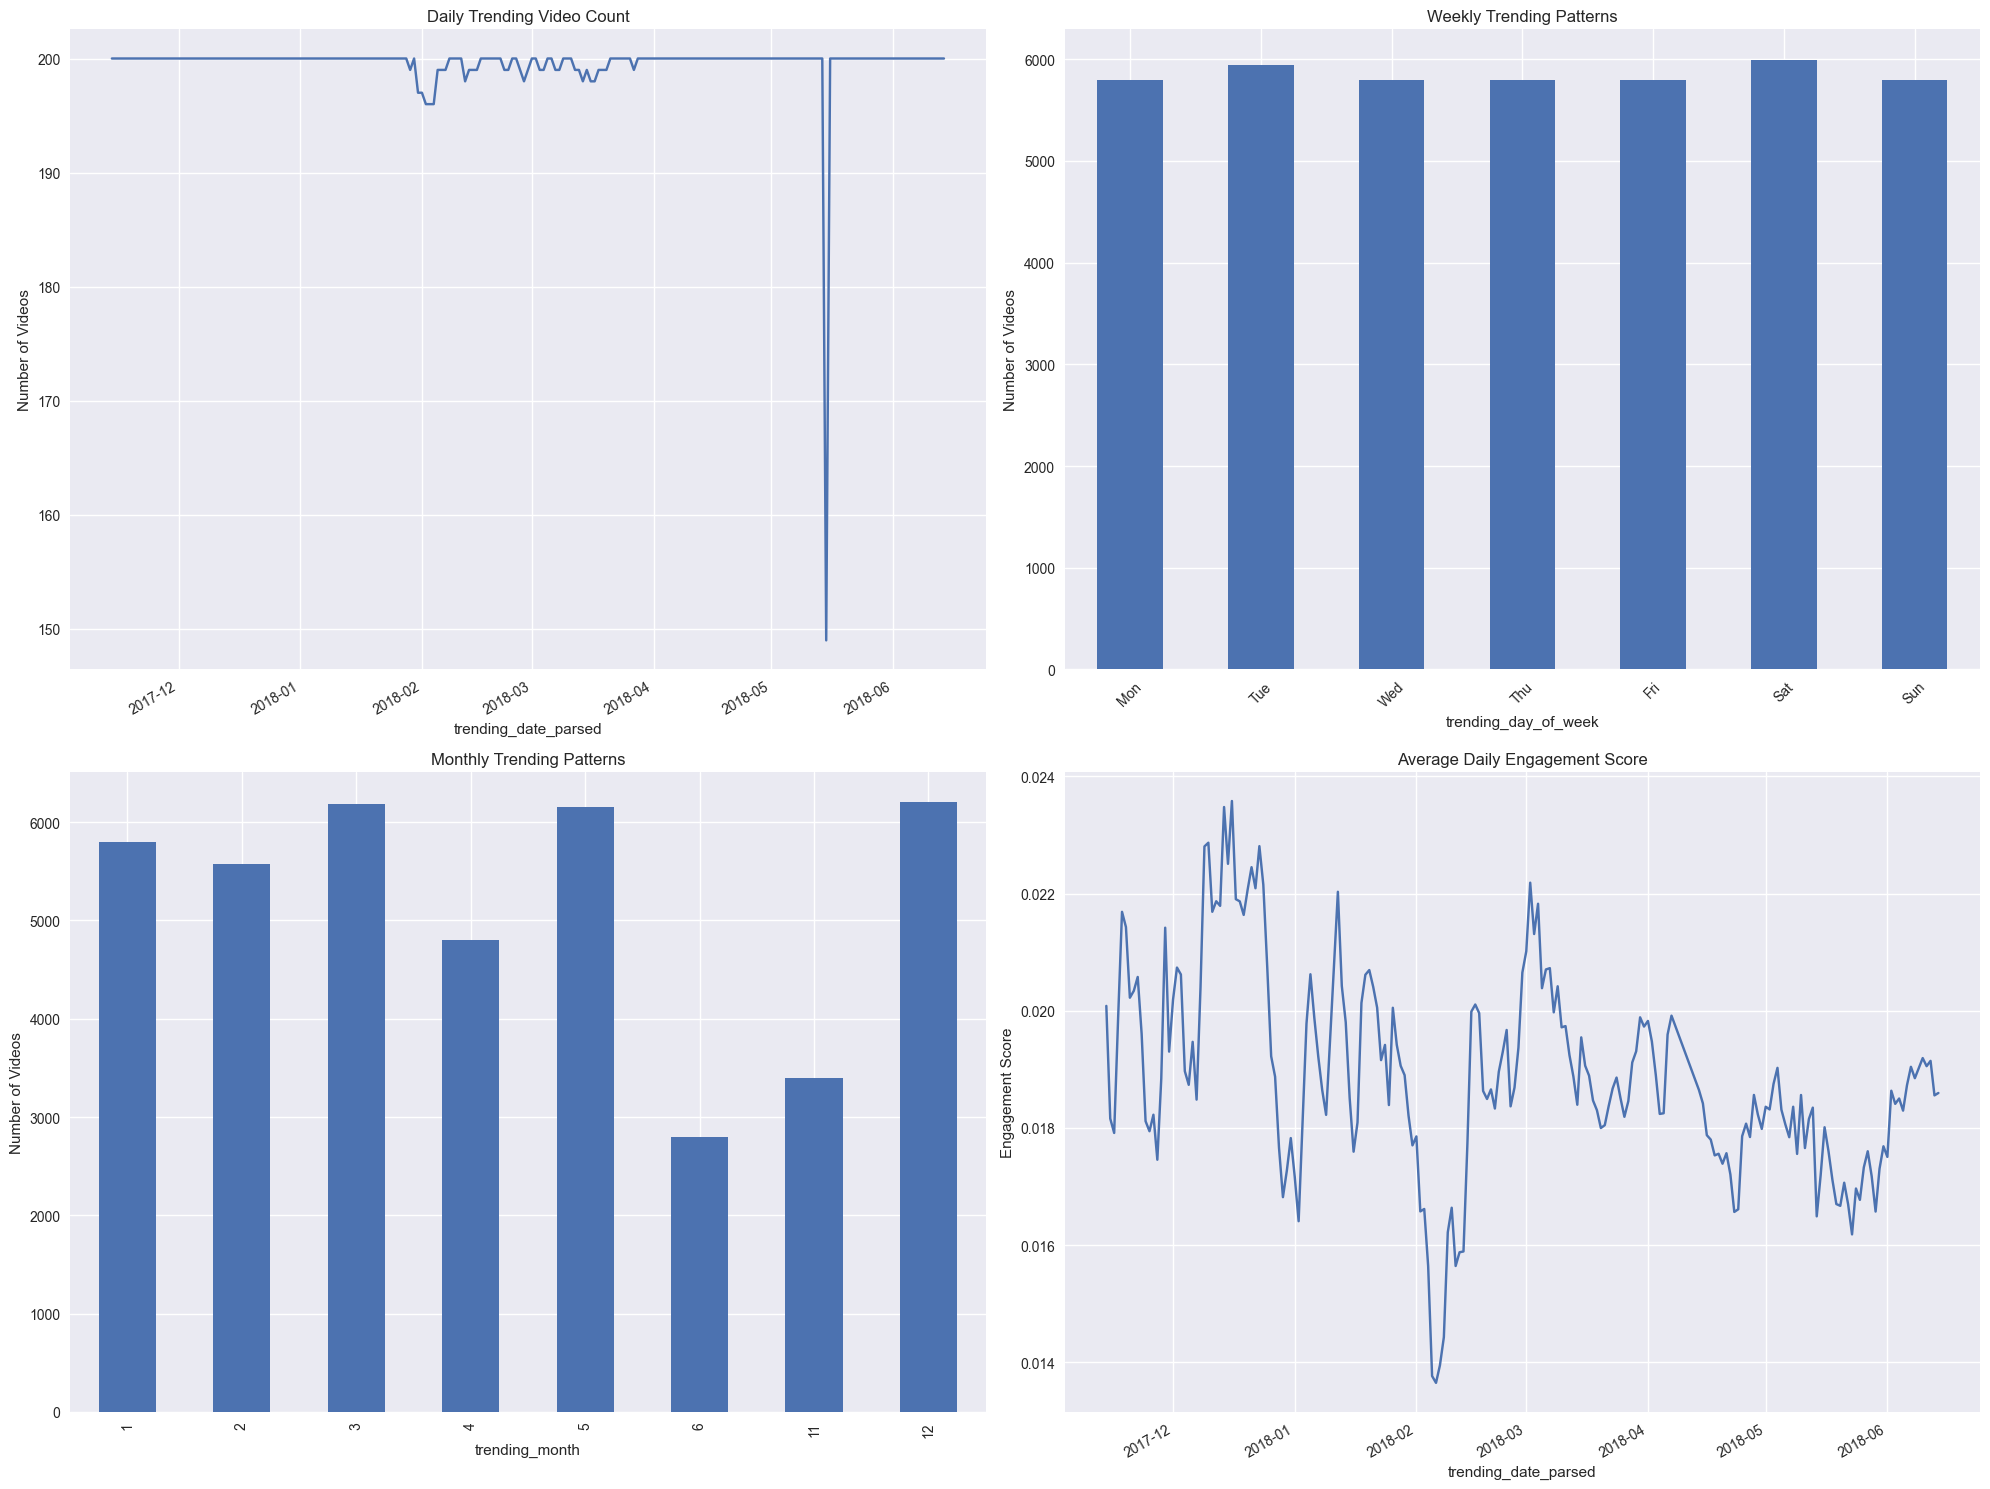


Key Temporal Insights:
Peak trending day: Sat
Peak trending month: 12
Average daily videos: 199.5


In [18]:
# Time Series Analysis
def perform_time_series_analysis(df):
    """Comprehensive time series analysis"""
    
    # 1. Daily trending volume analysis
    daily_trends = df.groupby('trending_date_parsed').agg({
        'video_id': 'count',
        'views': 'mean',
        'engagement_score': 'mean'
    }).rename(columns={'video_id': 'daily_video_count'})
    
    # 2. Weekly patterns
    df['trending_day_of_week'] = df['trending_date_parsed'].dt.dayofweek
    weekly_patterns = df.groupby('trending_day_of_week').agg({
        'video_id': 'count',
        'engagement_score': 'mean',
        'views': 'mean'
    })
    
    # 3. Monthly seasonality
    df['trending_month'] = df['trending_date_parsed'].dt.month
    monthly_patterns = df.groupby('trending_month').agg({
        'video_id': 'count',
        'engagement_score': 'mean',
        'views': 'mean'
    })
    
    # 4. Category trends over time
    category_time_trends = df.groupby(['trending_date_parsed', 'category_name']).size().unstack(fill_value=0)
    
    return daily_trends, weekly_patterns, monthly_patterns, category_time_trends

# Perform time series analysis
daily_trends, weekly_patterns, monthly_patterns, category_time_trends = perform_time_series_analysis(df_advanced)

print("Time Series Analysis Complete")
print(f"Daily trends shape: {daily_trends.shape}")
print(f"Date range: {daily_trends.index.min()} to {daily_trends.index.max()}")

# Visualize time series patterns
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Daily trending volume
daily_trends['daily_video_count'].plot(ax=axes[0,0], title='Daily Trending Video Count')
axes[0,0].set_ylabel('Number of Videos')

# Weekly patterns
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekly_patterns['video_id'].plot(kind='bar', ax=axes[0,1], title='Weekly Trending Patterns')
axes[0,1].set_xticklabels(day_names, rotation=45)
axes[0,1].set_ylabel('Number of Videos')

# Monthly seasonality
monthly_patterns['video_id'].plot(kind='bar', ax=axes[1,0], title='Monthly Trending Patterns')
axes[1,0].set_ylabel('Number of Videos')

# Engagement over time
daily_trends['engagement_score'].plot(ax=axes[1,1], title='Average Daily Engagement Score')
axes[1,1].set_ylabel('Engagement Score')

plt.tight_layout()
plt.show()

print("\nKey Temporal Insights:")
print(f"Peak trending day: {day_names[weekly_patterns['video_id'].idxmax()]}")
print(f"Peak trending month: {monthly_patterns['video_id'].idxmax()}")
print(f"Average daily videos: {daily_trends['daily_video_count'].mean():.1f}")

## 🔤 Natural Language Processing Analysis

Advanced text analysis on video titles and content

In [19]:
# NLP Analysis on Video Titles
def perform_nlp_analysis(df):
    """Comprehensive NLP analysis on video titles"""
    
    # Download required NLTK data
    try:
        nltk.download('punkt', quiet=True)
        nltk.download('stopwords', quiet=True)
        nltk.download('wordnet', quiet=True)
    except:
        print("NLTK data download skipped (may already exist)")
    
    # 1. Text preprocessing
    def preprocess_text(text):
        if pd.isna(text):
            return ""
        # Convert to lowercase and remove special characters
        text = re.sub(r'[^a-zA-Z\s]', '', str(text).lower())
        # Tokenize and remove stopwords
        try:
            stop_words = set(stopwords.words('english'))
            tokens = word_tokenize(text)
            tokens = [token for token in tokens if token not in stop_words and len(token) > 2]
            return ' '.join(tokens)
        except:
            return text
    
    df['title_processed'] = df['title'].apply(preprocess_text)
    
    # 2. TF-IDF Analysis
    vectorizer = TfidfVectorizer(max_features=100, ngram_range=(1, 2))
    tfidf_matrix = vectorizer.fit_transform(df['title_processed'].fillna(''))
    feature_names = vectorizer.get_feature_names_out()
    
    # Get top terms by category
    category_terms = {}
    for category in df['category_name'].unique():
        category_mask = df['category_name'] == category
        # Convert boolean mask to numpy array for scipy sparse matrix indexing
        category_indices = np.where(category_mask)[0]
        category_tfidf = tfidf_matrix[category_indices].mean(axis=0).A1
        top_indices = category_tfidf.argsort()[-10:][::-1]
        category_terms[category] = [(feature_names[i], category_tfidf[i]) for i in top_indices]
    
    # 3. Sentiment Analysis
    def get_sentiment(text):
        try:
            blob = TextBlob(str(text))
            return blob.sentiment.polarity
        except:
            return 0
    
    df['title_sentiment'] = df['title'].apply(get_sentiment)
    
    # 4. Word frequency analysis
    all_words = ' '.join(df['title_processed'].fillna('')).split()
    word_freq = pd.Series(all_words).value_counts().head(20)
    
    return category_terms, word_freq, df

# Perform NLP analysis
category_terms, word_freq, df_nlp = perform_nlp_analysis(df_advanced)

print("NLP Analysis Complete")
print(f"Sentiment scores range: {df_nlp['title_sentiment'].min():.3f} to {df_nlp['title_sentiment'].max():.3f}")

# Display top terms by category (sample)
print("\nTop Terms by Category (sample):")
for category, terms in list(category_terms.items())[:3]:
    print(f"\n{category}:")
    for term, score in terms[:5]:
        print(f"  {term}: {score:.4f}")

NLP Analysis Complete
Sentiment scores range: -1.000 to 1.000

Top Terms by Category (sample):

Nonprofits & Activism:
  to: 0.2015
  this: 0.1835
  be: 0.1404
  more: 0.1231
  with: 0.0885

Sports:
  the: 0.1308
  vs: 0.1058
  highlights: 0.0910
  game: 0.0661
  to: 0.0587

People & Blogs:
  the: 0.0923
  to: 0.0650
  with: 0.0535
  my: 0.0487
  in: 0.0421


## 🎯 Advanced Statistical Analysis

Hypothesis testing and statistical validation

Statistical Analysis Results:

Category Engagement Test:
  Test: Kruskal-Wallis
  Statistic: 8204.7997
  P-value: 0.000000
  Significant: True

Sentiment Engagement Test:
  Test: Mann-Whitney U
  Statistic: 34496247.5000
  P-value: 0.000112
  Significant: True

Sentiment Effect Size: 0.0953


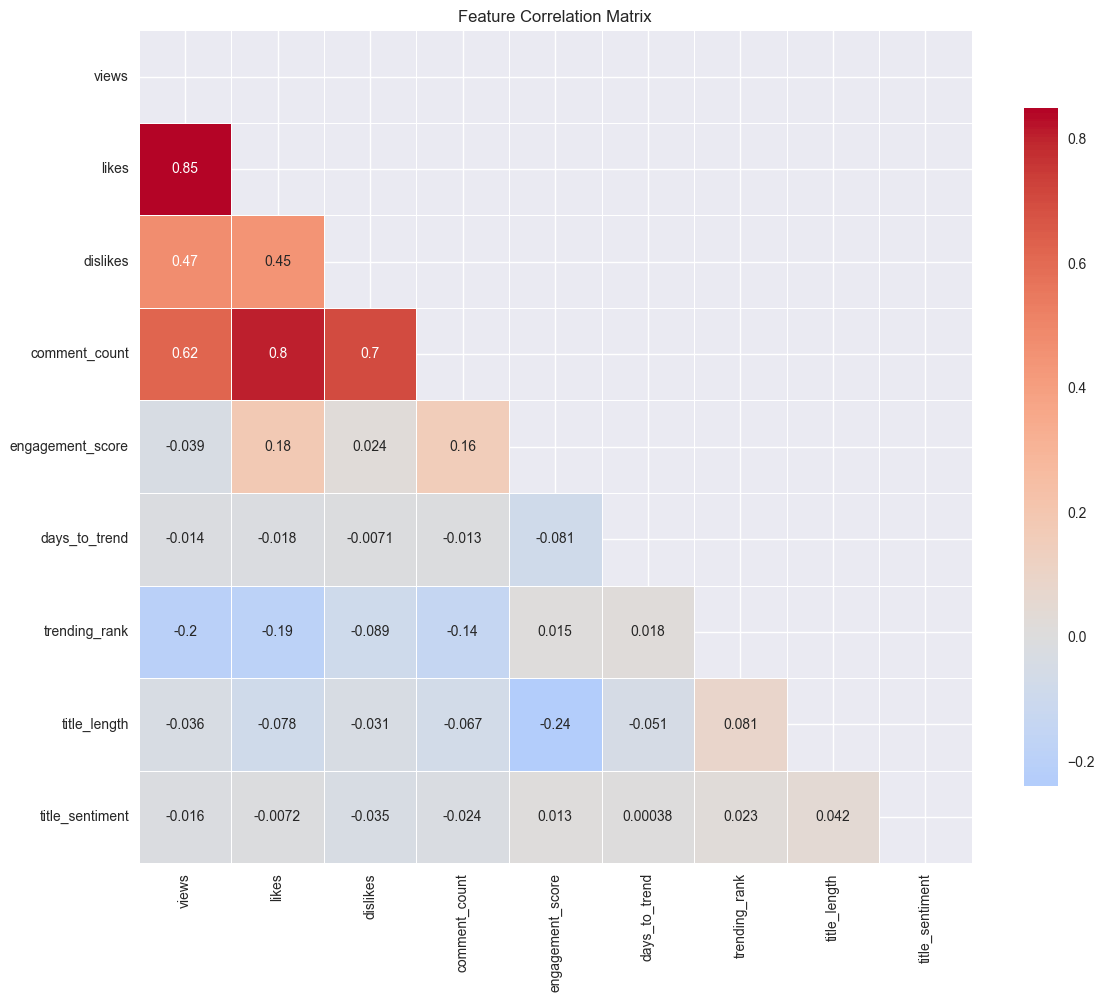

In [20]:
# Advanced Statistical Analysis
def perform_statistical_analysis(df):
    """Comprehensive statistical testing and analysis"""
    
    results = {}
    
    # 1. Hypothesis Test: Do different categories have different engagement scores?
    category_groups = [group['engagement_score'].values for name, group in df.groupby('category_name')]
    kruskal_stat, kruskal_p = kruskal(*category_groups)
    results['category_engagement_test'] = {
        'test': 'Kruskal-Wallis',
        'statistic': kruskal_stat,
        'p_value': kruskal_p,
        'significant': kruskal_p < 0.05
    }
    
    # 2. Hypothesis Test: Do videos with positive sentiment have higher engagement?
    positive_sentiment = df[df['title_sentiment'] > 0]['engagement_score']
    negative_sentiment = df[df['title_sentiment'] < 0]['engagement_score']
    mann_whitney_stat, mann_whitney_p = mannwhitneyu(positive_sentiment, negative_sentiment, alternative='greater')
    results['sentiment_engagement_test'] = {
        'test': 'Mann-Whitney U',
        'statistic': mann_whitney_stat,
        'p_value': mann_whitney_p,
        'significant': mann_whitney_p < 0.05
    }
    
    # 3. Correlation Analysis
    numeric_cols = ['views', 'likes', 'dislikes', 'comment_count', 'engagement_score', 
                   'days_to_trend', 'trending_rank', 'title_length', 'title_sentiment']
    correlation_matrix = df[numeric_cols].corr()
    
    # 4. Effect Size Analysis
    # Cohen's d for sentiment effect on engagement
    def cohens_d(group1, group2):
        n1, n2 = len(group1), len(group2)
        s1, s2 = group1.std(), group2.std()
        pooled_std = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2) / (n1+n2-2))
        return (group1.mean() - group2.mean()) / pooled_std
    
    sentiment_effect_size = cohens_d(positive_sentiment, negative_sentiment)
    results['sentiment_effect_size'] = sentiment_effect_size
    
    return results, correlation_matrix

# Perform statistical analysis
statistical_results, correlation_matrix = perform_statistical_analysis(df_nlp)

print("Statistical Analysis Results:")
print("=" * 50)

for test_name, result in statistical_results.items():
    if isinstance(result, dict):
        print(f"\n{test_name.replace('_', ' ').title()}:")
        print(f"  Test: {result['test']}")
        print(f"  Statistic: {result['statistic']:.4f}")
        print(f"  P-value: {result['p_value']:.6f}")
        print(f"  Significant: {result['significant']}")
    else:
        print(f"\n{test_name.replace('_', ' ').title()}: {result:.4f}")

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()